In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
gsr=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training_Data.csv')

In [0]:
gsr_val=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Test_May_10.csv')

gsr.head(5)

In [0]:
gsr.shape

(20000, 135)

In [0]:
gsr=gsr.apply(lambda x: x.fillna(x.mean()))

In [0]:
gsr_val=gsr_val.apply(lambda x: x.fillna(x.mean())) 

In [5]:
gsr_val.shape

(5000, 137)

In [0]:
x_val1=gsr_val[['5yrs_sharpe_ratio_fund','10yrs_sharpe_ratio_fund','3yrs_sharpe_ratio_fund','fund_return_3years','3_years_alpha_fund','5_years_return_fund','5_years_alpha_fund','5_years_return_mean_annual_fund','10_years_alpha_fund','3_years_return_mean_annual_fund','10_years_return_fund','10_years_return_mean_annual_fund','1_year_return_fund','2015_return_fund','2014_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2011_return_fund','2017_return_fund','years_up','10yrs_sharpe_ratio_category','1_month_fund_return','fund_return_3months','return_ytd','ytd_return_fund','total_assets','2016_return_fund','investment_class_Growth','2010_return_category','maturity_bond','yield','ID-20 and older','portfolio_tech_allocation','mmc','ID-10 to 15','5yrs_sharpe_ratio_category','ID-0 to 5 years','5years_fund_std','3years_fund_std','10years_fund_std','2012_return_category','10_years_return_category','fund_beta_3years','ID-5 to 10','a_rating','pb_ratio','2013_return_fund','2014_category_return','ytd_return_category','3_months_return_category','category_return_1year','category_return_1month','2017_category_return','2016_return_category']]

In [7]:
print(x_val1.shape)
x_val1_scaled = preprocessing.scale(x_val1)

(5000, 55)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
x1=gsr[['5yrs_sharpe_ratio_fund','10yrs_sharpe_ratio_fund','3yrs_sharpe_ratio_fund','fund_return_3years','3_years_alpha_fund','5_years_return_fund','5_years_alpha_fund','5_years_return_mean_annual_fund','10_years_alpha_fund','3_years_return_mean_annual_fund','10_years_return_fund','10_years_return_mean_annual_fund','1_year_return_fund','2015_return_fund','2014_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2011_return_fund','2017_return_fund','years_up','10yrs_sharpe_ratio_category','1_month_fund_return','fund_return_3months','return_ytd','ytd_return_fund','total_assets','2016_return_fund','investment_class_Growth','2010_return_category','maturity_bond','yield','ID-20 and older','portfolio_tech_allocation','mmc','ID-10 to 15','5yrs_sharpe_ratio_category','ID-0 to 5 years','5years_fund_std','3years_fund_std','10years_fund_std','2012_return_category','10_years_return_category','fund_beta_3years','ID-5 to 10','a_rating','pb_ratio','2013_return_fund','2014_category_return','ytd_return_category','3_months_return_category','category_return_1year','category_return_1month','2017_category_return','2016_return_category']]

In [0]:
print(x1.shape)
x1_scaled = preprocessing.scale(x1)

(20000, 55)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
y=gsr[['greatstone_rating_0','greatstone_rating_1','greatstone_rating_2','greatstone_rating_3','greatstone_rating_4','greatstone_rating_5']]

In [0]:
y_all=gsr['greatstone_rating']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report, confusion_matrix,accuracy_score
clf=RandomForestClassifier( n_jobs=9999,n_estimators=9999,criterion="entropy",random_state=999)
#clf3=RandomForestClassifier( n_jobs=9999,n_estimators=9999,criterion="entropy",random_state=999)

In [0]:
clf.fit(x1, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9999,
                       n_jobs=9999, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [0]:
y_predict_val1 = clf.predict(x_val1)

In [0]:
y_predict_val_exp1=pd.DataFrame(y_predict_val1)

In [0]:
y_predict_val_exp1.to_excel('/content/drive/My Drive/Colab Notebooks/y_predict_Rating_1st_Run.xlsx')

In [0]:
gsr1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training_Data_1.csv')

In [0]:
gsr1.shape

(24045, 135)

In [0]:
gsr1=gsr1.apply(lambda x: x.fillna(x.mean()))

In [0]:
x2=gsr1[['5yrs_sharpe_ratio_fund','10yrs_sharpe_ratio_fund','3yrs_sharpe_ratio_fund','fund_return_3years','3_years_alpha_fund','5_years_return_fund','5_years_alpha_fund','5_years_return_mean_annual_fund','10_years_alpha_fund','3_years_return_mean_annual_fund','10_years_return_fund','10_years_return_mean_annual_fund','1_year_return_fund','2015_return_fund','2014_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2011_return_fund','2017_return_fund','years_up','10yrs_sharpe_ratio_category','1_month_fund_return','fund_return_3months','return_ytd','ytd_return_fund','total_assets','2016_return_fund','investment_class_Growth','2010_return_category','maturity_bond','yield','ID-20 and older','portfolio_tech_allocation','mmc','ID-10 to 15','5yrs_sharpe_ratio_category','ID-0 to 5 years','5years_fund_std','3years_fund_std','10years_fund_std','2012_return_category','10_years_return_category','fund_beta_3years','ID-5 to 10','a_rating','pb_ratio','2013_return_fund','2014_category_return','ytd_return_category','3_months_return_category','category_return_1year','category_return_1month','2017_category_return','2016_return_category']]

In [0]:
x2.shape

(24045, 55)

In [0]:
y1=gsr1[['greatstone_rating_0','greatstone_rating_1','greatstone_rating_2','greatstone_rating_3','greatstone_rating_4','greatstone_rating_5']]

In [0]:
y1_all=gsr1['greatstone_rating']

In [0]:
clf.fit(x2, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9999,
                       n_jobs=9999, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [0]:
y_predict_val2 = clf.predict(x_val1)

In [0]:
y_predict_val_exp2=pd.DataFrame(y_predict_val2)

In [0]:
y_predict_val_exp2.to_excel('/content/drive/My Drive/Colab Notebooks/y_predict_Rating_2nd_Run.xlsx')

In [0]:
gsr2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training_Data_2.csv')

In [10]:
gsr2.shape

(24177, 135)

In [0]:
gsr2=gsr2.apply(lambda x: x.fillna(x.mean()))

In [0]:
x3=gsr2[['5yrs_sharpe_ratio_fund','10yrs_sharpe_ratio_fund','3yrs_sharpe_ratio_fund','fund_return_3years','3_years_alpha_fund','5_years_return_fund','5_years_alpha_fund','5_years_return_mean_annual_fund','10_years_alpha_fund','3_years_return_mean_annual_fund','10_years_return_fund','10_years_return_mean_annual_fund','1_year_return_fund','2015_return_fund','2014_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2011_return_fund','2017_return_fund','years_up','10yrs_sharpe_ratio_category','1_month_fund_return','fund_return_3months','return_ytd','ytd_return_fund','total_assets','2016_return_fund','investment_class_Growth','2010_return_category','maturity_bond','yield','ID-20 and older','portfolio_tech_allocation','mmc','ID-10 to 15','5yrs_sharpe_ratio_category','ID-0 to 5 years','5years_fund_std','3years_fund_std','10years_fund_std','2012_return_category','10_years_return_category','fund_beta_3years','ID-5 to 10','a_rating','pb_ratio','2013_return_fund','2014_category_return','ytd_return_category','3_months_return_category','category_return_1year','category_return_1month','2017_category_return','2016_return_category']]

In [13]:
x3.shape

(24177, 55)

In [0]:
y2=gsr2[['greatstone_rating_0','greatstone_rating_1','greatstone_rating_2','greatstone_rating_3','greatstone_rating_4','greatstone_rating_5']]

In [0]:
y2_all=gsr2['greatstone_rating']

In [19]:
clf.fit(x3, y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9999,
                       n_jobs=9999, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [0]:
y_predict_val3 = clf.predict(x_val1)

In [0]:
y_predict_val_exp3=pd.DataFrame(y_predict_val3)

In [0]:
y_predict_val_exp3.to_excel('/content/drive/My Drive/Colab Notebooks/y_predict_Rating_3rd_Run.xlsx')

In [0]:
gsr3=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training_Data_97.csv')

In [40]:
gsr3.shape

(24979, 135)

In [0]:
gsr3=gsr3.apply(lambda x: x.fillna(x.mean()))

In [0]:
x4=gsr3[['5yrs_sharpe_ratio_fund','10yrs_sharpe_ratio_fund','3yrs_sharpe_ratio_fund','fund_return_3years','3_years_alpha_fund','5_years_return_fund','5_years_alpha_fund','5_years_return_mean_annual_fund','10_years_alpha_fund','3_years_return_mean_annual_fund','10_years_return_fund','10_years_return_mean_annual_fund','1_year_return_fund','2015_return_fund','2014_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2011_return_fund','2017_return_fund','years_up','10yrs_sharpe_ratio_category','1_month_fund_return','fund_return_3months','return_ytd','ytd_return_fund','total_assets','2016_return_fund','investment_class_Growth','2010_return_category','maturity_bond','yield','ID-20 and older','portfolio_tech_allocation','mmc','ID-10 to 15','5yrs_sharpe_ratio_category','ID-0 to 5 years','5years_fund_std','3years_fund_std','10years_fund_std','2012_return_category','10_years_return_category','fund_beta_3years','ID-5 to 10','a_rating','pb_ratio','2013_return_fund','2014_category_return','ytd_return_category','3_months_return_category','category_return_1year','category_return_1month','2017_category_return','2016_return_category']]

In [43]:
x4.shape

(24979, 55)

In [0]:
y3=gsr3[['greatstone_rating_0','greatstone_rating_1','greatstone_rating_2','greatstone_rating_3','greatstone_rating_4','greatstone_rating_5']]

In [0]:
y3_all=gsr3['greatstone_rating']

In [46]:
clf.fit(x4, y3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9999,
                       n_jobs=9999, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [0]:
y_predict_val3 = clf.predict(x_val1)

In [0]:
y_predict_val_exp3=pd.DataFrame(y_predict_val3)

In [0]:
y_predict_val_exp3.to_excel('/content/drive/My Drive/Colab Notebooks/y_predict_Rating_97.xlsx')

In [50]:
clf.fit(x4, y3_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9999,
                       n_jobs=9999, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [0]:
y_predict_val5 = clf.predict(x_val1)

In [0]:
y_predict_val_exp5=pd.DataFrame(y_predict_val5)

In [0]:
y_predict_val_exp5.to_excel('/content/drive/My Drive/Colab Notebooks/y_predict_Rating_Final.xlsx')

Using Other models

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

In [0]:
y0=gsr['greatstone_rating_0']

In [0]:
LR.fit(x2,y0)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [0]:
y0_val=LR.predict(x_val)

In [0]:
y_predict_val_exp0=pd.DataFrame(y0_val)

In [0]:
y_predict_val_exp0.to_excel('/content/drive/My Drive/Colab Notebooks/y_val_0.xlsx')

In [0]:
x_train_scaled = preprocessing.scale(x_train2)
x_test_scaled = preprocessing.scale(x_test2)
clf3.fit(x_train_scaled, y_train)
y_predict = clf3.predict(x_test_scaled)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[[ 378    2    6    1    0    1]
 [   1  206  159   43    4    0]
 [   0   40  883  318   15    2]
 [   0    6  170 1663  196    8]
 [   2    0   28  376  966   56]
 [   0    0    4   42  142  282]]
0.7296666666666667


In [0]:
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[[ 384    0    2    1    0    1]
 [   1  266  140    6    0    0]
 [   0   44  975  229   10    0]
 [   1    1  132 1715  191    3]
 [   1    0    8  266 1084   69]
 [   0    0    1    8  122  339]]
0.7938333333333333


In [0]:
x_train_scaled = preprocessing.scale(x_train2)
x_test_scaled = preprocessing.scale(x_test2)
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_test_scaled)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[[ 379    1    4    2    1    1]
 [   0  240  164    9    0    0]
 [   0   32  984  232    9    1]
 [   0    2  137 1742  161    1]
 [   1    0   10  305 1058   54]
 [   0    0    1   12  137  320]]
0.7871666666666667


In [0]:
x1=gsr.drop(['greatstone_rating','tag','maturity_bond'],axis=1)

In [0]:
x_train1, x_test1, y_train, y_test = train_test_split(x1, y, test_size=0.30,random_state=1)

In [0]:
clf.fit(x_train1, y_train)
y_predict = clf.predict(x_test1)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[ 384    0    2    1    0    1]
 [   1  267  138    7    0    0]
 [   0   43  975  231    9    0]
 [   1    1  131 1714  192    4]
 [   1    0    8  267 1080   72]
 [   0    0    1    7  119  343]]
0.7938333333333333


In [0]:
x_graph1=remcor[['greatstone_rating','investment_class_Blend','investment_class_Growth','investment_class_Value','investment_class_null','total_assets','yield','inception_date','return_ytd']]

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
x2.iloc[1:1,58:64]

,ID-3 years,ID-3 to 5 years,ID-5 to 10,ID-10 to 15,ID-15 to 20,ID-20 and older


In [0]:
x_graph1=remcor[['greatstone_rating','investment_class_Blend','investment_class_Growth','investment_class_Value','investment_class_null','total_assets','yield','tag','fund_size_Large','fund_size_Medium','fund_size_Small','fund_size_Null','return_ytd','10years_category_r_squared','10yrs_sharpe_ratio_fund','10_years_alpha_fund','10years_fund_r_squared','10years_fund_std','10yrs_sharpe_ratio_category','10_years_beta_fund','10yrs_treynor_ratio_fund','10_years_return_mean_annual_category','10yrs_treynor_ratio_category','10_years_return_fund','10_years_alpha_category','10_years_beta_category','10years_category_std','10_years_return_mean_annual_fund','10_years_return_category','category_r_squared_5years','5yrs_sharpe_ratio_fund','5_years_alpha_fund','5years_fund_r_squared','5years_fund_std','5yrs_sharpe_ratio_category','5_years_beta_fund','5yrs_treynor_ratio_fund','5_years_return_mean_annual_fund','5_years_return_mean_annual_category','5yrs_treynor_ratio_category','5_years_return_fund','5_years_alpha_category','5_years_beta_category','5years_category_std','5_years_return_category','portfolio_communication_allocation','portfolio_financial_services','portfolio_industrials_allocation','portfolio_tech_allocation','portfolio_materials_basic_allocation','portfolio_energy_allocation','portfolio_consumer_defence_allocation','portfolio_healthcare_allocation','portfolio_property_allocation','portfolio_utils_allocation','portfolio_cyclical_consumer_allocation','3yrs_treynor_ratio_fund','3_years_alpha_fund','3years_category_std','3yrs_sharpe_ratio_fund','3yrs_treynor_ratio_category','3_years_return_mean_annual_fund','fund_beta_3years','3years_fund_r_squared','3years_fund_std','category_beta_3years','fund_return_3years','3_years_alpha_category','3_years_return_mean_annual_category','3yrs_sharpe_ratio_category','3years_category_r_squared','3_years_return_category','2014_category_return','2012_return_category','years_up','2018_return_category','category_return_1year','cash_percent_of_portfolio','pc_ratio','2011_return_category','ytd_return_fund','years_down','2014_return_fund','category_return_1month','2013_return_fund','fund_return_3months','ytd_return_category','pb_ratio','2017_category_return','1_year_return_fund','pe_ratio','2015_return_fund','portfolio_convertable','3_months_return_category','portfolio_others','2016_return_fund','mmc','stock_percent_of_portfolio','2016_return_category','ps_ratio','2011_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2017_return_fund','category_ratio_net_annual_expense','category_return_2015','1_month_fund_return','bond_percentage_of_porfolio','portfolio_preferred','2010_return_category','2013_category_return','fund_ratio_net_annual_expense','bb_rating','us_govt_bond_rating','below_b_rating','others_rating','maturity_bond','b_rating','a_rating','aaa_rating','aa_rating','bbb_rating','duration_bond','ID-0 to 5 years','ID-5 to 10','ID-10 to 15','ID-15 to 20','ID-20 and older']]

In [0]:
#sns.heatmap(x_graph1.corr(),annot=True)

In [0]:
x_graph1.corr().iloc[0:1,90:140]

,pe_ratio,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc,stock_percent_of_portfolio,2016_return_category,ps_ratio,2011_return_fund,2010_return_fund,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,fund_ratio_net_annual_expense,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,ID-0 to 5 years,ID-5 to 10,ID-10 to 15,ID-15 to 20,ID-20 and older
greatstone_rating,-0.029939,0.017527,-0.031088,-0.094119,0.01038,0.113006,-0.073684,-0.090317,0.001938,0.01243,0.091519,0.208266,0.156733,0.161358,0.02095,0.055587,-0.017804,0.016611,0.127266,0.056802,0.127266,0.061365,0.032409,0.019607,NaN,0.048095,0.082008,-0.019528,0.039603,0.105736,0.010698,0.148066,0.074215,-0.153938,-0.595584,0.280114,0.237211,0.126403,0.216975


In [0]:
x_r5=pd.DataFrame(x_graph1.corr().abs()>.01)

greatstone_rating_5  greatstone_rating_5    True
dtype: bool

In [0]:
x_r5.unstack()
print (x_r5)

                         greatstone_rating_5  ...  ID-20 and older
greatstone_rating_5                     True  ...             True
investment_class_Blend                  True  ...             True
investment_class_Growth                 True  ...             True
investment_class_Value                  True  ...            False
investment_class_null                  False  ...             True
...                                      ...  ...              ...
ID-3 to 5 years                         True  ...             True
ID-5 to 10                              True  ...             True
ID-10 to 15                             True  ...             True
ID-15 to 20                             True  ...             True
ID-20 and older                         True  ...             True

[130 rows x 130 columns]


In [0]:
x_graph1['greatstone_rating_3'].head(2)

0    1
1    0
Name: greatstone_rating_3, dtype: int64

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
remcor=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Test_May_10_Remain_Corr.csv')

In [0]:
x_graph2=gsr[['greatstone_rating','10years_category_r_squared','10yrs_sharpe_ratio_fund','10_years_alpha_fund','10years_fund_r_squared','10years_fund_std','10yrs_sharpe_ratio_category','10_years_beta_fund','10yrs_treynor_ratio_fund','10_years_return_mean_annual_category','10yrs_treynor_ratio_category','10_years_return_fund','10_years_alpha_category','10_years_beta_category','10years_category_std','10_years_return_mean_annual_fund','10_years_return_category']]

In [0]:
x_graph2=gsr[['greatstone_rating','10years_fund_r_squared','10years_fund_std','10yrs_sharpe_ratio_category','10_years_beta_fund','10yrs_treynor_ratio_fund']]

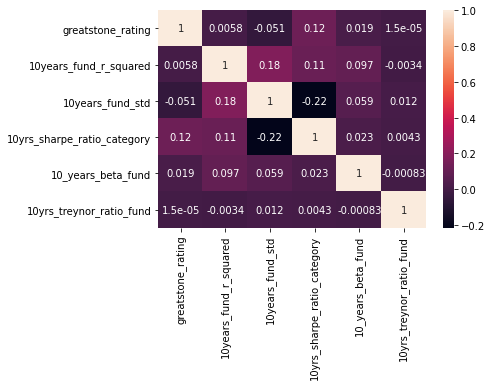

In [0]:
sns.heatmap(x_graph2.corr(),annot=True)

In [0]:
x_graph3=gsr[['greatstone_rating','5yrs_treynor_ratio_category','5_years_return_fund','5_years_alpha_category','5_years_beta_category','5years_category_std','5_years_return_category']]

In [0]:
x_graph3=gsr[['greatstone_rating','category_r_squared_5years','5yrs_sharpe_ratio_fund','5_years_alpha_fund','5years_fund_r_squared','5years_fund_std','5yrs_sharpe_ratio_category','5_years_beta_fund','5yrs_treynor_ratio_fund','5_years_return_mean_annual_fund','5_years_return_mean_annual_category','5yrs_treynor_ratio_category','5_years_return_fund','5_years_alpha_category','5_years_beta_category','5years_category_std','5_years_return_category']]

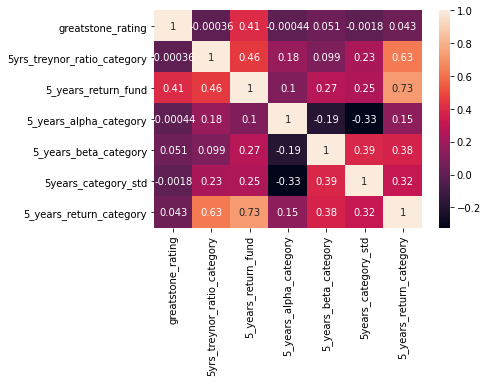

In [0]:
sns.heatmap(x_graph3.corr(),annot=True)

In [0]:
x_graph4=gsr[['greatstone_rating','portfolio_healthcare_allocation','portfolio_property_allocation','portfolio_utils_allocation','portfolio_cyclical_consumer_allocation']]

In [0]:
x_graph4=gsr[['greatstone_rating','portfolio_communication_allocation','portfolio_financial_services','portfolio_industrials_allocation','portfolio_tech_allocation','portfolio_materials_basic_allocation','portfolio_energy_allocation','portfolio_consumer_defence_allocation','portfolio_healthcare_allocation','portfolio_property_allocation','portfolio_utils_allocation','portfolio_cyclical_consumer_allocation']]

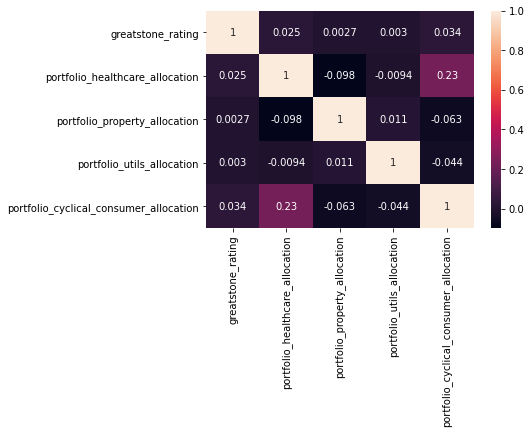

In [0]:
sns.heatmap(x_graph4.corr(),annot=True)

In [0]:
x_graph5=gsr[['greatstone_rating','fund_return_3years','3_years_alpha_category','3_years_return_mean_annual_category','3yrs_sharpe_ratio_category','3years_category_r_squared','3_years_return_category']]

In [0]:
x_graph5=gsr[['greatstone_rating','3yrs_treynor_ratio_fund','3_years_alpha_fund','3years_category_std','3yrs_sharpe_ratio_fund','3yrs_treynor_ratio_category','3_years_return_mean_annual_fund','fund_beta_3years','3years_fund_r_squared','3years_fund_std','category_beta_3years','fund_return_3years','3_years_alpha_category','3_years_return_mean_annual_category','3yrs_sharpe_ratio_category','3years_category_r_squared','3_years_return_category']]

x_graph5=gsr[['greatstone_rating','3yrs_treynor_ratio_fund','3_years_alpha_fund','3years_category_std','3yrs_sharpe_ratio_fund','3yrs_treynor_ratio_category','3_years_return_mean_annual_fund','fund_beta_3years','3years_fund_r_squared','3years_fund_std','category_beta_3years','fund_return_3years','3_years_alpha_category','3_years_return_mean_annual_category','3yrs_sharpe_ratio_category','3years_category_r_squared','3_years_return_category']]

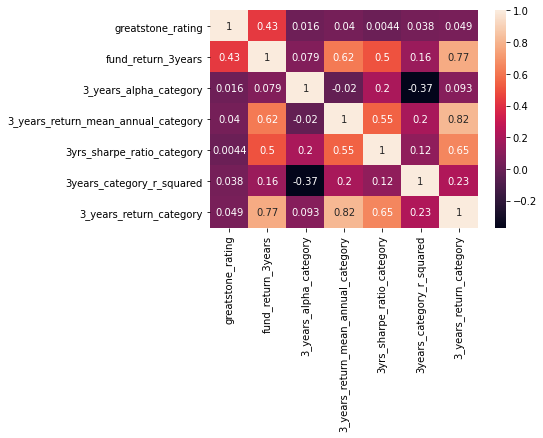

In [0]:
sns.heatmap(x_graph5.corr(),annot=True)

In [0]:
x_graph6=gsr[['greatstone_rating','a_rating','aaa_rating','aa_rating','bbb_rating','duration_bond']]

In [0]:
x_graph6=gsr[['greatstone_rating','fund_ratio_net_annual_expense','bb_rating','us_govt_bond_rating','below_b_rating','others_rating','maturity_bond','b_rating','a_rating','aaa_rating','aa_rating','bbb_rating','duration_bond']]

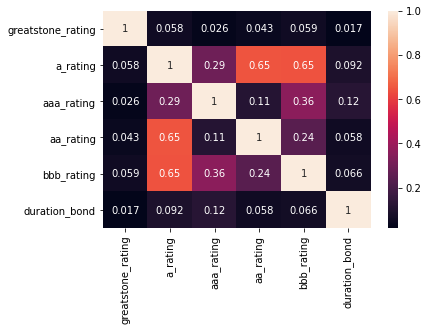

In [0]:
sns.heatmap(x_graph6.corr(),annot=True)

In [0]:
x_graph7=gsr[['greatstone_rating','category_ratio_net_annual_expense','category_return_2015','1_month_fund_return','bond_percentage_of_porfolio','portfolio_preferred','2010_return_category','2013_category_return']]

In [0]:
x_graph7=gsr[['greatstone_rating','2014_category_return','2012_return_category','years_up','2018_return_category','category_return_1year','cash_percent_of_portfolio','pc_ratio','2011_return_category','ytd_return_fund','years_down','2014_return_fund','category_return_1month','2013_return_fund','fund_return_3months','ytd_return_category','pb_ratio','2017_category_return','1_year_return_fund','pe_ratio','2015_return_fund','portfolio_convertable','3_months_return_category','portfolio_others','2016_return_fund','mmc','stock_percent_of_portfolio','2016_return_category','ps_ratio','2011_return_fund','2010_return_fund','2012_fund_return','2018_return_fund','2017_return_fund','category_ratio_net_annual_expense','category_return_2015','1_month_fund_return','bond_percentage_of_porfolio','portfolio_preferred','2010_return_category','2013_category_return']]

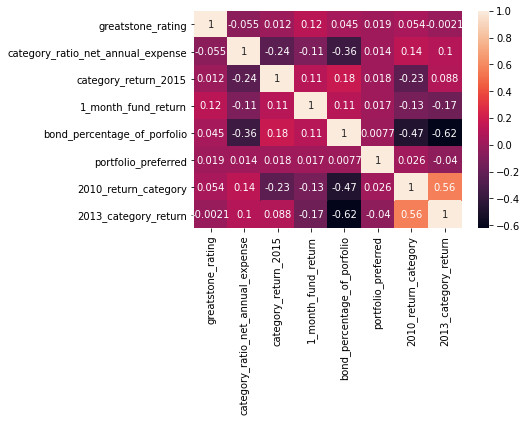

In [0]:
sns.heatmap(x_graph7.corr(),annot=True)

In [0]:
x2=gsr.drop(['greatstone_rating','tag','investment_class_null','inception_date','10years_category_r_squared','10years_fund_r_squared','10years_fund_std','10_years_beta_fund','10yrs_treynor_ratio_fund','10_years_return_mean_annual_category','10yrs_treynor_ratio_category','10_years_alpha_category','10_years_beta_category','10years_category_std','10_years_return_category','category_r_squared_5years','5years_fund_r_squared','5years_fund_std','5yrs_sharpe_ratio_category','5_years_beta_fund','5yrs_treynor_ratio_fund','5yrs_treynor_ratio_category','5_years_alpha_category','5_years_beta_category','5years_category_std','5_years_return_category','portfolio_communication_allocation','portfolio_financial_services','portfolio_industrials_allocation','portfolio_tech_allocation','portfolio_materials_basic_allocation','portfolio_energy_allocation','portfolio_consumer_defence_allocation','portfolio_healthcare_allocation','portfolio_property_allocation','portfolio_utils_allocation','portfolio_cyclical_consumer_allocation','3yrs_treynor_ratio_fund','3years_category_std','3yrs_treynor_ratio_category','fund_beta_3years','3years_fund_r_squared','3years_fund_std','category_beta_3years','3_years_alpha_category','3_years_return_mean_annual_category','3yrs_sharpe_ratio_category','3years_category_r_squared','3_years_return_category','fund_ratio_net_annual_expense','bb_rating','below_b_rating','others_rating','maturity_bond','b_rating','a_rating','aaa_rating','aa_rating','bbb_rating','duration_bond','cash_percent_of_portfolio','us_govt_bond_rating','fund_size_Null'],axis=1)

In [0]:
x2.head(2)

,investment_class_Blend,investment_class_Growth,investment_class_Value,total_assets,yield,fund_size_Large,fund_size_Medium,fund_size_Small,return_ytd,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10yrs_sharpe_ratio_category,10_years_return_fund,10_years_return_mean_annual_fund,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5_years_return_fund,3_years_alpha_fund,3yrs_sharpe_ratio_fund,3_years_return_mean_annual_fund,fund_return_3years,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,pc_ratio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio,2017_category_return,1_year_return_fund,pe_ratio,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc,stock_percent_of_portfolio,2016_return_category,ps_ratio,2011_return_fund,2010_return_fund,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,1,0,0,530280000.0,1.43,1,0,0,12.79,0.73,-1.90,0.01,6.39,0.55,0.31,-2.04,0.27,0.00,2.94,-1.72,0.70,0.60,7.10,1.54,10.74,7.0,-8.26,0.09,9.81,-3.990000,12.79,4.0,3.03,0.99,0.82,12.79,7.81,1.93,14.79,9.49,21.58,-9.71,0.0,7.81,4.6,4.01,14247.52,76.25,6.04,2.32,-3.460000,12.200000,9.32,-5.37,14.67,1.01,-4.15,2.76,15.35,0.00,10.580000,10.07
1,1,0,0,88840000.0,2.62,1,0,0,9.21,0.97,-2.11,0.01,12.01,1.01,0.62,-2.60,0.60,0.01,6.91,-0.44,1.01,0.83,10.09,10.96,14.96,5.0,-6.27,6.90,13.60,-1.817817,9.21,2.0,9.69,1.29,30.05,9.21,12.94,2.94,20.44,5.51,11.76,-3.02,0.0,12.94,0.0,11.26,147673.66,47.13,10.37,2.81,-1.302252,13.549694,12.37,-5.53,17.05,0.94,-1.07,1.54,49.75,1.14,13.120187,31.50


In [0]:
x2.shape

(20000, 62)

In [0]:
x_train2, x_test2, y_train, y_test = train_test_split(x2, y, test_size=0.30,random_state=1)

In [0]:
clf.fit(x_train2, y_train)
y_predict = clf.predict(x_test2)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[ 381    1    2    3    0    1]
 [   1  256  149    7    0    0]
 [   0   39  974  235   10    0]
 [   1    3  137 1714  187    1]
 [   2    0    9  277 1073   67]
 [   0    0    1   11  120  338]]
0.7893333333333333


In [0]:
clf.fit(scaledx_train2, y_train)
y_predict = clf.predict(scaledx_test2)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

NameError: ignored

In [0]:
y_predict_val = clf.predict(x_val)

In [0]:
# Import `Sequential` from `keras.models`
from tensorflow import keras
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
# Import `Dense` from `keras.layers`
from keras.layers import Dense,Dropout,Activation,Flatten

In [0]:
model = Sequential()

In [0]:
x_train2.shape

(14000, 62)

In [0]:
model.add(Dense(960, activation='relu', input_shape=(62,)))

# Add an input layer 
#model.add(Dense(8, activation='relu', input_shape=(10,)))

# Add 1st hidden layer 
model.add(Dense(480, activation='relu'))

# Add 2nd hidden layer 
model.add(Dense(10, activation='relu'))

# Add 3rd hidden layer 
model.add(Dense(12, activation='relu'))

# Add an output layer 
model.add(Dense(6, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model1.fit(x_train2,y_train2,batch_size=300,epochs=12,verbose=1,validation_data=(x_test2,y_test2))

ValueError: ignored

In [0]:
model1 = Sequential()

In [0]:
model.add(Dense(960, activation='relu', input_shape=(123,)))

# Add an input layer 
#model.add(Dense(8, activation='relu', input_shape=(10,)))

# Add 1st hidden layer 
model1.add(Dense(480, activation='relu'))

# Add 2nd hidden layer 
model1.add(Dense(120, activation='relu'))

# Add 3rd hidden layer 
model1.add(Dense(12, activation='relu'))

# Add an output layer 
model1.add(Dense(6, activation='softmax'))

In [0]:
from keras.utils import np_utils

In [0]:
#Encoding the output class label (One-Hot Encoding)
y_train2=np_utils.to_categorical(y_train,6)
y_test2=np_utils.to_categorical(y_test,6)
y_train2[2]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
x_train.head(2)

,investment_class_Blend,investment_class_Growth,investment_class_Value,investment_class_null,total_assets,yield,inception_date,fund_size_Large,fund_size_Medium,fund_size_Small,fund_size_Null,return_ytd,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,...,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio,2017_category_return,1_year_return_fund,pe_ratio,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc,stock_percent_of_portfolio,2016_return_category,ps_ratio,2011_return_fund,2010_return_fund,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,fund_ratio_net_annual_expense,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
11408,0,1,0,0,3.193200e+08,0.00,2,1,0,0,0,10.13,0.91,0.44,-1.41,83.59,14.80,0.01,0.86,6.55,0.01,0.10,6.08,0.02,0.01,0.15,0.58,9.97,0.83,0.24,0.76,74.95,12.18,0.0,0.88,2.51,0.31,0.00,0.03,3.01,...,13.54,10.13,13.00,2.74,30.87,-2.82,18.34,4.04,0.0,13.00,0.19,-6.39,15367.55,96.75,-2.14,1.65,-17.56,3.44,17.65,-12.81,30.68,1.13,0.95,1.92,0.0,0.0,14.78,18.58,2.27,0.0,0.0,0.0,0.0,7.758483,0.0,0.0,0.0,0.0,0.0,4.628102
3616,1,0,0,0,2.130000e+09,0.91,3,0,0,1,0,11.48,0.76,0.95,-1.61,75.78,17.27,0.01,1.18,13.58,0.01,0.12,16.54,-0.03,0.01,0.17,1.41,14.67,0.65,0.51,-3.48,64.10,15.85,0.0,1.14,6.30,0.74,0.01,0.04,7.95,...,40.76,11.48,13.34,1.72,12.28,1.12,15.83,-2.24,0.0,13.34,0.00,25.84,1599.55,99.84,20.78,0.92,0.82,26.05,16.02,-8.88,12.41,1.15,-5.38,-3.40,0.0,0.0,25.61,37.39,0.50,0.0,0.0,0.0,0.0,7.758483,0.0,0.0,0.0,0.0,0.0,4.628102


In [0]:
model1.fit(x_train,y_train2,batch_size=300,epochs=12,verbose=1,validation_data=(x_test,y_test2))

ValueError: ignored

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
x_trainnew2 = pca.fit_transform(x_train2)
x_testnew2 = pca.transform(x_test2)

In [0]:
clf.fit(x_trainnew2, y_train)
y_predict = clf.predict(x_testnew2)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[ 379    0    3    4    1    1]
 [   0  190  186   37    0    0]
 [   5   32  776  431   14    0]
 [   1    1  152 1646  239    4]
 [   2    0   10  488  864   64]
 [   0    0    4   53  174  239]]
0.6823333333333333


In [0]:
clf.fit(scaledx_train2, y_train)
y_predict = clf.predict(scaledx_test2)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[ 381    1    2    2    1    1]
 [   0  255  150    8    0    0]
 [   0   38  978  232   10    0]
 [   1    3  135 1715  188    1]
 [   2    0    8  277 1073   68]
 [   0    0    1   10  122  337]]
0.7898333333333334


In [0]:
x_train2['fund_size_Null'].head(2)

11408    0
3616     0
Name: fund_size_Null, dtype: int64

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt_model = DecisionTreeClassifier(criterion = 'entropy') #max_depth=None,min_samples_leaf=1  
dt_model.fit(scaledx_train2,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#dt_model.score(x_train_scaled , y_train) 
dt_model.score(scaledx_test2 , y_test)      # performance on test data, y_train)

0.6943333333333334

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
sc.fit(x_train2)
scaledx_train2 = sc.transform(x_train2)
scaledx_test2 = sc.transform(x_test2)

In [0]:
#k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train2,y_train)
print("Testing Accuracy")
print(knn.score(x_test2,y_test))
print("Training Accuracy")
print(knn.score(x_train2,y_train))
#predicted = knn.predict(scaledx_test2)

Testing Accuracy
0.4838877338877339
Training Accuracy
0.7282651072124756


In [0]:
#k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train2,y_train)
print("Testing Accuracy")
print(knn.score(x_test2,y_test))
print("Training Accuracy")
print(knn.score(x_train2,y_train))
predicted = knn.predict(x_test2)

Testing Accuracy
0.4696666666666667
Training Accuracy
0.7407857142857143
